In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

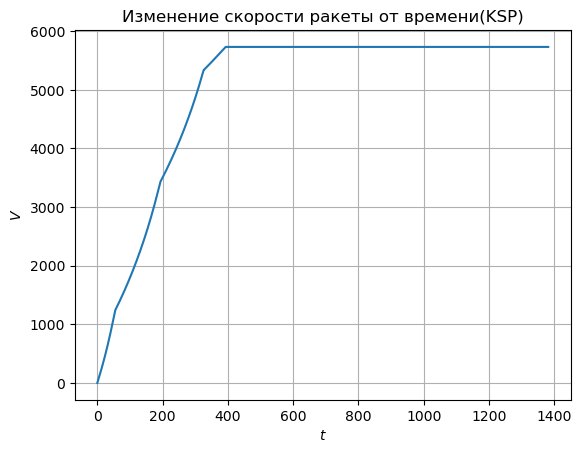

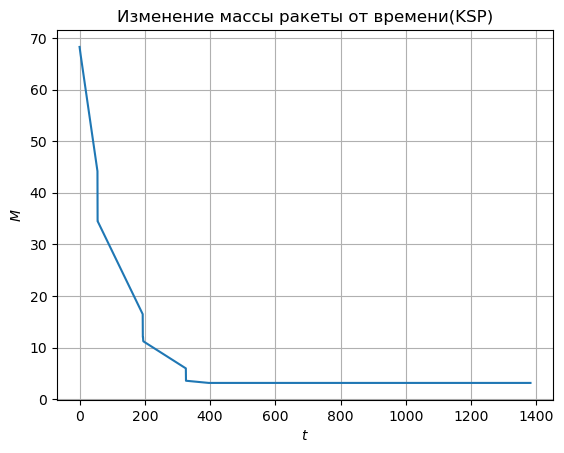

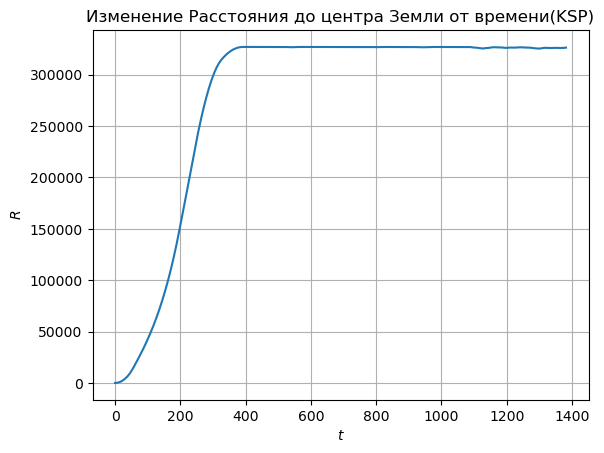

In [188]:
data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Velocity = data_ksp["DeltaVExpended"]
plt.plot(Time, Velocity)
plt.ylabel(r'$V$')
plt.xlabel(r'$t$')
plt.title(r'Изменение скорости ракеты от времени(KSP)')
plt.grid(True)
plt.show()

data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Value = data_ksp["Mass"]
plt.plot(Time, Value)
plt.ylabel(r'$M$')
plt.xlabel(r'$t$')
plt.title(r'Изменение массы ракеты от времени(KSP)')
plt.grid(True)
plt.show()

data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Value = data_ksp["AltitudeTrue"]
plt.plot(Time, Value)
plt.ylabel(r'$R$')
plt.xlabel(r'$t$')
plt.title(r'Изменение Расстояния до центра Земли от времени(KSP)')
plt.grid(True)
plt.show()

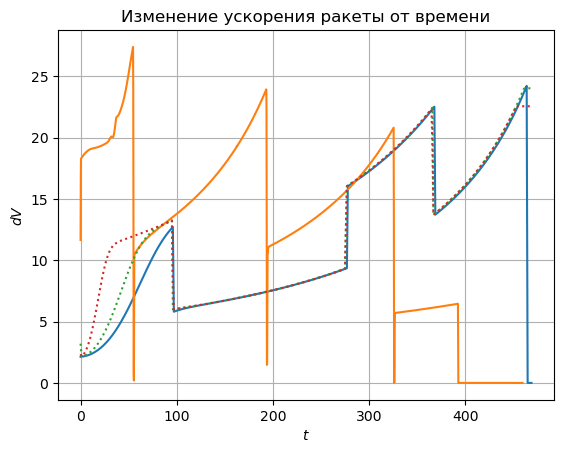

Синий - 


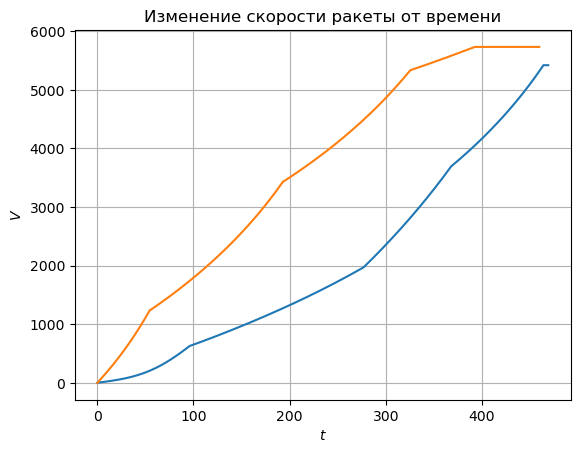

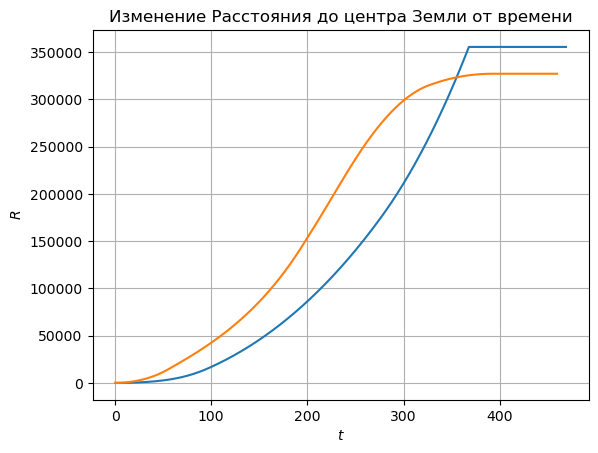

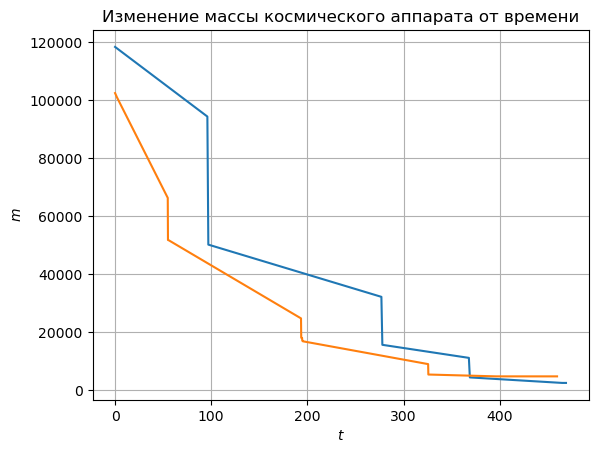

Text(0.5, 0, 't')

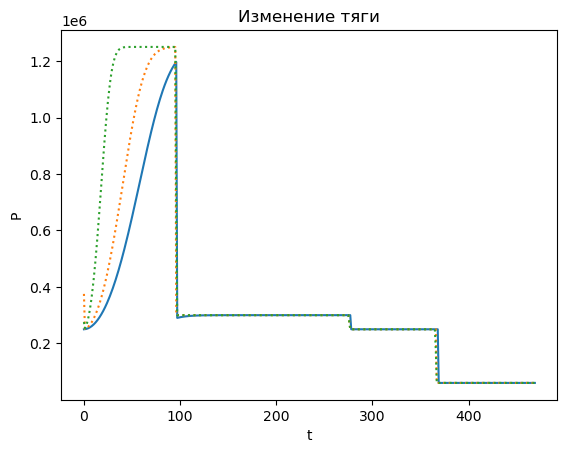

In [76]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

cos45 = 2 ** 0.5 / 2
G = 6.67430 * 10 ** (-11)
a = 360_000
b = 180_000
Mz = 5.2915793 * 10 ** 22
Pa = 1000_000
Pa2 = 200_000
Sa1 = 1
Sa2 = 0.2
Wa = 1000

m = (44.171 + 34.585 + 12.063 + 3.600) * 10 ** 3
mf = 24.120 * 10 ** 3
dm = 250
dt = 1
R = 14_000_000
Velocity = 0
altitude = 0
dV = 0


def Ftyag(G, rm, Mz, R):
    return G * (rm * Mz) / R ** 2


def Pn(alt):
    return 1000_000 * e ** (-alt / 5000)


P_graph = np.array([])
h_graph = np.array([])
dv_graph = np.array([])
velocity_graph = np.array([])
mass_graph = np.array([])
time_graph = np.array([0])
while mf >= 0:
    mf -= dm * dt
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm * dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa1
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude
    
    P_graph = np.append(P_graph, P)
    h_graph = np.append(h_graph, R)
    dv_graph = np.append(dv_graph, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)
    time_graph = np.append(time_graph, time_graph[-1] + dt)


mf = 18.001 * 10 ** 3
m =  (16.584 + 12.063 + 3.600) * 10 ** 3
dm = 100

while mf >= 0:
    mf -= dm * dt
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm * dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude
    
    P_graph = np.append(P_graph, P)
    h_graph = np.append(h_graph, R)
    dv_graph = np.append(dv_graph, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)
    time_graph = np.append(time_graph, time_graph[-1] + dt)


mf = 4.500 * 10 ** 3
m = (7.563 + 3.600) * 10 ** 3
dm = 50

while mf >= 0:
    mf -= dm * dt
    rm = mf + m

    Ft = Ftyag(G, rm, Mz, R)
    P = dm * dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude
    
    P_graph = np.append(P_graph, P)
    h_graph = np.append(h_graph, R)
    dv_graph = np.append(dv_graph, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)
    time_graph = np.append(time_graph, time_graph[-1] + dt)

mf = 1.900 * 10 ** 3
m = 2.500 * 10 ** 3
dm = 20

while mf >= 0:
    mf -= dm * dt
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm * dt * Wa + Pa2 * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    if Velocity >= 5520:
        break
    
    P_graph = np.append(P_graph, P)
    dv_graph = np.append(dv_graph, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)
    time_graph = np.append(time_graph, time_graph[-1] + dt)

for _ in range(200):
    V = (G * Mz * (2 / b - 1 / a)) ** 0.5
    P_graph = np.append(P_graph, P_graph[-1])
    dv_graph = np.append(dv_graph, 0)
    velocity_graph = np.append(velocity_graph, Velocity)
    h_graph = np.append(h_graph, R)
    mass_graph = np.append(mass_graph, m + mf)
    time_graph = np.append(time_graph, time_graph[-1] + dt)


data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"][0:1950]
TIME = list(range(470))
time_graph = time_graph[1:]
data_ksp = pd.read_csv("ksp.csv", sep=";")
acceleration_ksp = data_ksp["Acceleration"]

with open("dv_graph1.csv") as file:
    dv_graph1 = [float(x[0]) for x in csv.reader(file)]

with open("dv_graph2.csv") as file:
    dv_graph2 = [float(x[0]) for x in csv.reader(file)]


plt.plot(TIME, dv_graph[0:len(TIME)], Time, [x * 10 for x in acceleration_ksp][0:len(Time)], TIME, dv_graph1[0:len(TIME)], ":", 
         TIME, dv_graph2[0:len(TIME)], ":")
plt.ylabel(r'$dV$')
plt.xlabel(r'$t$')
plt.title(r'Изменение ускорения ракеты от времени')
plt.grid(True)
plt.show()


# VELOCITY GRAPH
data_ksp = pd.read_csv("ksp.csv", sep=";")
velocity_ksp = data_ksp["DeltaVExpended"]
plt.plot(TIME, velocity_graph[0:len(TIME)], Time, velocity_ksp[0:len(Time)])
plt.ylabel(r'$V$')
plt.xlabel(r'$t$')
plt.title(r'Изменение скорости ракеты от времени')
plt.grid(True)
plt.show()

# HEIGHT GRAPH
data_ksp = pd.read_csv("ksp.csv", sep=";")
height_ksp = data_ksp["AltitudeTrue"]
plt.plot(TIME, [x - 14_000_000 for x in h_graph][0:len(TIME)], Time, height_ksp[0:len(Time)])
plt.ylabel(r'$R$')
plt.xlabel(r'$t$')
plt.title(r'Изменение Расстояния до центра Земли от времени')
plt.grid(True)
plt.show()


data_ksp = pd.read_csv("ksp.csv", sep=";")
mass_ksp = data_ksp["Mass"]
plt.plot(TIME, mass_graph[0:len(TIME)], Time, [x * 1000 * 1.5 for x in mass_ksp][0:len(Time)])
plt.title(r'Изменение массы космического аппарата от времени')
plt.ylabel(r'$m$')
plt.xlabel(r'$t$')
plt.grid(True)
plt.show()


with open("P_graph1.csv") as file:
    P_graph1 = [float(x[0]) for x in csv.reader(file)]
with open("P_graph2.csv") as file:
    P_graph2 = [float(x[0]) for x in csv.reader(file)]
plt.plot(TIME, P_graph[0:len(TIME)], TIME, P_graph1[0:len(TIME)], ":", TIME, P_graph2[0:len(TIME)], ":")
plt.title(r"Изменение тяги")
plt.ylabel(r"P")
plt.xlabel(r"t")